In [1]:
import time
from copy import deepcopy

import networkx as nx
import pandas as pd
from matplotlib import pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
from pgmpy.estimators import BicScore, BDeuScore, HillClimbSearch, K2Score, MmhcEstimator, PC
from pgmpy.models import BayesianModel

sys.path.append('../')
import src.utils as utils
from src.hidden_prints import HiddenPrints, RedirectOutput
from src.model import BayesianNetworkModel

# Managing Warnings 
import warnings
warnings.filterwarnings('ignore')

## Load and prepare data

In [2]:
data = utils.load_data()
data = utils.split_data(data)

In [3]:
data_copy = deepcopy(data)

continuous_attrs = ['wife_age', 'n_children']
data = utils.discretize_data(
    data=data, 
    continuous_attrs=continuous_attrs,
    n_bins=5
)

X_train = data['train']['X']
y_train = data['train']['y']
X_test = data['test']['X']
y_test = data['test']['y']

train_ds = pd.concat([X_train, y_train], axis=1)
test_ds = pd.concat([X_test, y_test], axis=1)

nodes = [
    'wife_age', 'wife_edu', 'husband_edu', 'n_children', 'wife_religion', 
    'wife_working', 'husband_occup', 'sol_index', 'media_exposure', 
    'class'
]

## Prepare networks

### Own network proposals

---- Network 1 ----


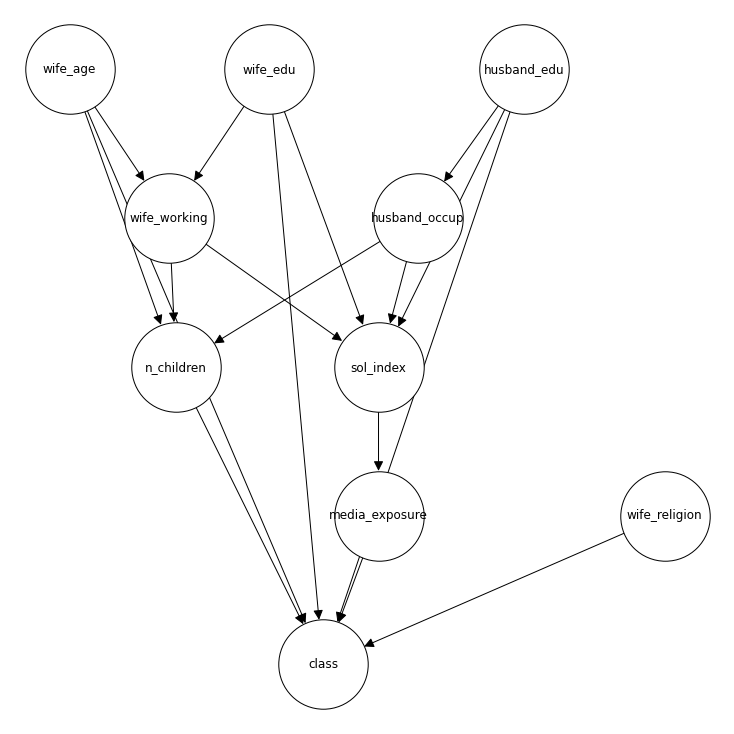

---- Network 2 ----


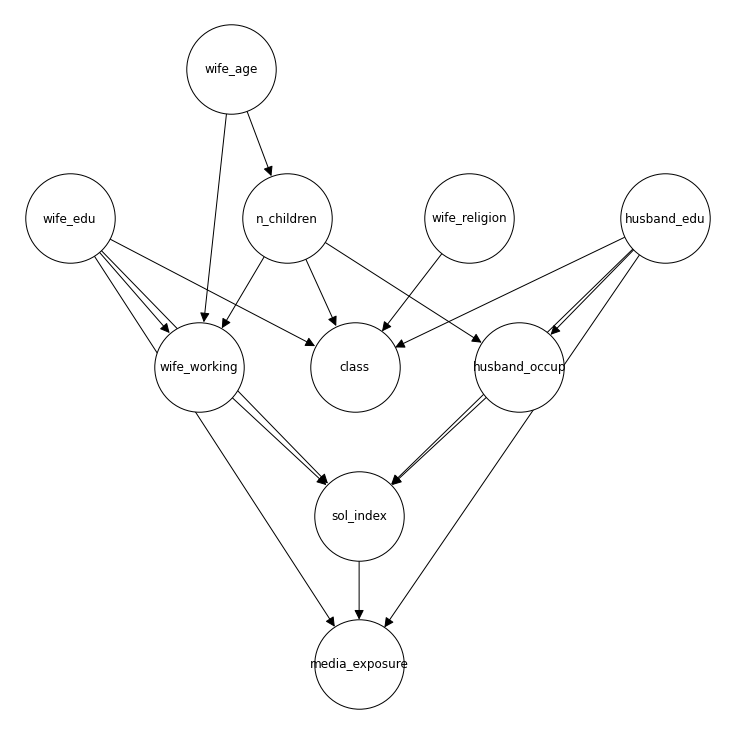

---- Network 3 ----


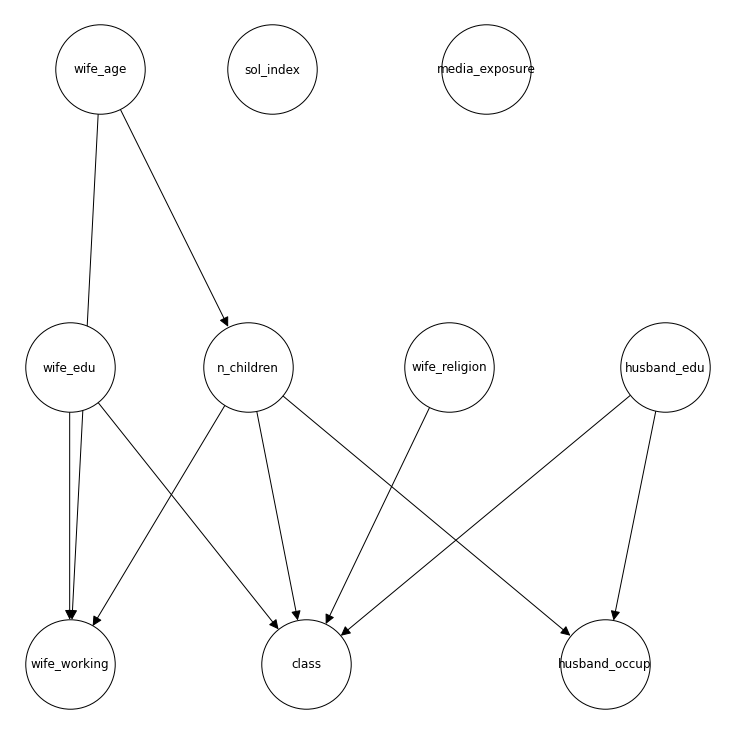

---- Network 4 ----


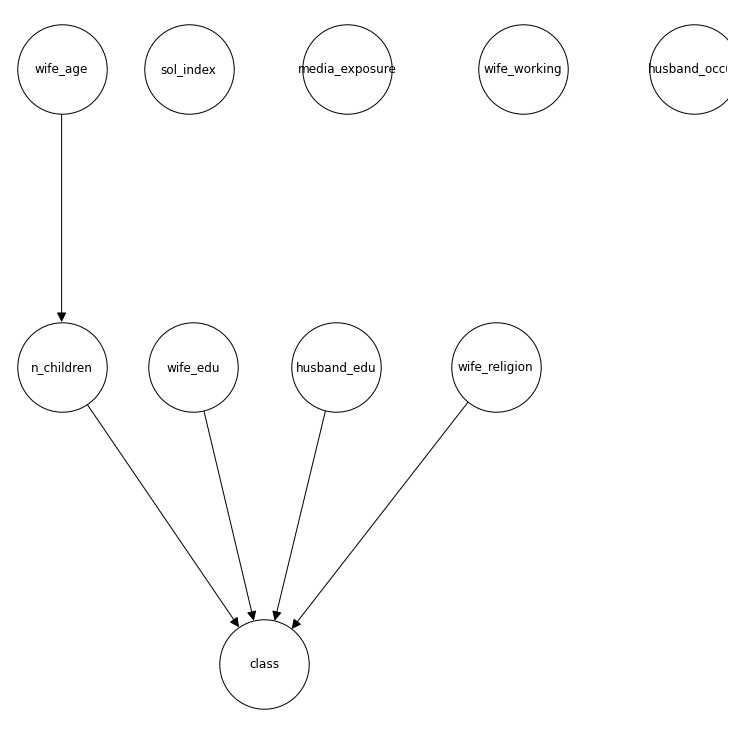

---- Network 5 ----


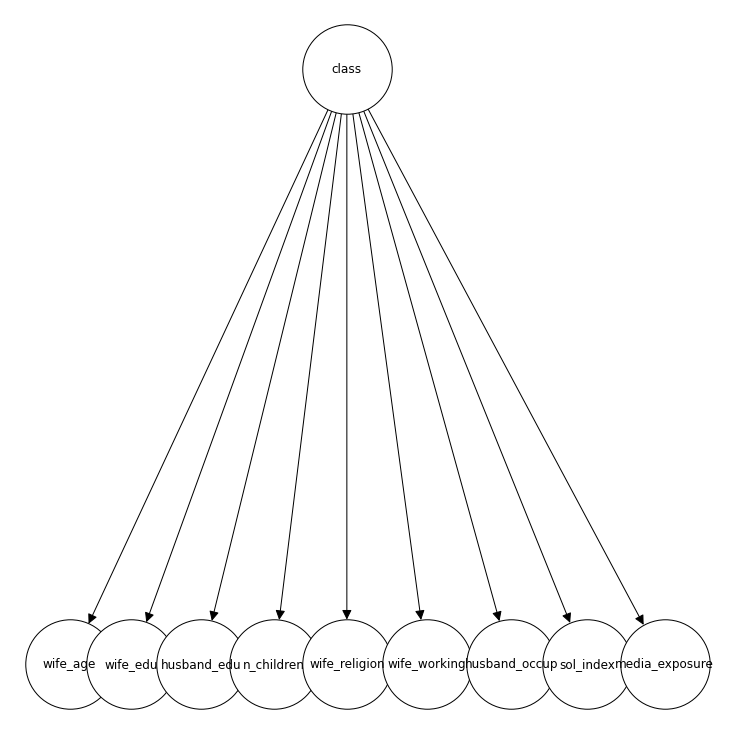

In [4]:
# [
#     'wife_age', 'wife_edu', 'husband_edu', 'n_children', 'wife_religion', 
#     'wife_working', 'husband_occup', 'sol_index', 'media_exposure', 
#     'class'
# ]


# ---- Network 1 ----
print('---- Network 1 ----')
network_1 = BayesianModel([
    ('wife_age','n_children'), ('wife_age','wife_working'), ('wife_age','class'), 
    ('wife_edu','wife_working'), ('wife_edu','sol_index'), ('wife_edu','class'), 
    ('husband_edu','husband_occup'), ('husband_edu','sol_index'), ('husband_edu','class'), 
    ('n_children','class'), 
    ('wife_religion','class'), 
    ('wife_working','n_children'), ('wife_working','sol_index'), 
    ('husband_occup','n_children'), ('husband_occup','sol_index'), 
    ('sol_index','media_exposure'), 
    ('media_exposure','class'), 
])

utils.plot_network(network_1)
#               precision    recall  f1-score   support
#            1       0.49      0.74      0.59       126
#            2       0.42      0.24      0.30        67
#            3       0.49      0.32      0.39       102

#     accuracy                           0.48       295
#    macro avg       0.47      0.43      0.43       295
# weighted avg       0.47      0.48      0.46       295


# ---- Network 2 ----
print('---- Network 2 ----')
network_2 = BayesianModel([
    ('wife_age','n_children'), ('wife_age','wife_working'), 
    ('wife_edu','wife_working'), ('wife_edu','sol_index'), ('wife_edu','media_exposure'), ('wife_edu','class'),
    ('husband_edu','husband_occup'), ('husband_edu','sol_index'), ('husband_edu','media_exposure'), ('husband_edu','class'),
    ('n_children','wife_working'), ('n_children','husband_occup'), ('n_children','class'), 
    ('wife_religion','class'), 
    ('wife_working','sol_index'), 
    ('husband_occup','sol_index'), 
    ('sol_index','media_exposure'),
])

utils.plot_network(network_2)
#               precision    recall  f1-score   support
#            1       0.48      0.80      0.60       126
#            2       0.53      0.25      0.34        67
#            3       0.45      0.24      0.31       102

#     accuracy                           0.48       295
#    macro avg       0.49      0.43      0.42       295
# weighted avg       0.48      0.48      0.44       295


# ---- Network 3 ----
print('---- Network 3 ----')
network_3 = BayesianModel([
    ('wife_age','n_children'), ('wife_age','wife_working'), 
    ('wife_edu','wife_working'), ('wife_edu','class'),
    ('husband_edu','husband_occup'), ('husband_edu','class'),
    ('n_children','wife_working'), ('n_children','husband_occup'), ('n_children','class'), 
    ('wife_religion','class'), 
])
network_3.add_node('sol_index')
network_3.add_node('media_exposure')

utils.plot_network(network_3)
#               precision    recall  f1-score   support
#            1       0.48      0.80      0.60       126
#            2       0.53      0.25      0.34        67
#            3       0.45      0.24      0.31       102

#     accuracy                           0.48       295
#    macro avg       0.49      0.43      0.42       295
# weighted avg       0.48      0.48      0.44       295


# ---- Network 4 ----
print('---- Network 4 ----')
network_4 = BayesianModel([
    ('wife_age','n_children'), 
    ('wife_edu','class'),
    ('husband_edu','class'),
    ('n_children','class'), 
    ('wife_religion','class'), 
])
network_4.add_node('sol_index')
network_4.add_node('media_exposure')
network_4.add_node('wife_working')
network_4.add_node('husband_occup')

utils.plot_network(network_4)
#               precision    recall  f1-score   support
#            1       0.48      0.80      0.60       126
#            2       0.53      0.25      0.34        67
#            3       0.45      0.24      0.31       102

#     accuracy                           0.48       295
#    macro avg       0.49      0.43      0.42       295
# weighted avg       0.48      0.48      0.44       295


# ---- Network 5 (NaiveBayes) ----
print('---- Network 5 ----')
network_5 = BayesianModel()
for col in list(X_train.columns):
    network_5.add_edge('class', col)

utils.plot_network(network_5)
#               precision    recall  f1-score   support
#            1       0.64      0.60      0.62       126
#            2       0.37      0.51      0.43        67
#            3       0.45      0.38      0.41       102

#     accuracy                           0.50       295
#    macro avg       0.49      0.50      0.49       295
# weighted avg       0.51      0.50      0.50       295

### HillClimbSearch (Tabu Search)

  0%|          | 14/1000000 [00:01<24:46:19, 11.21it/s]
---- Network hcs_bic ----


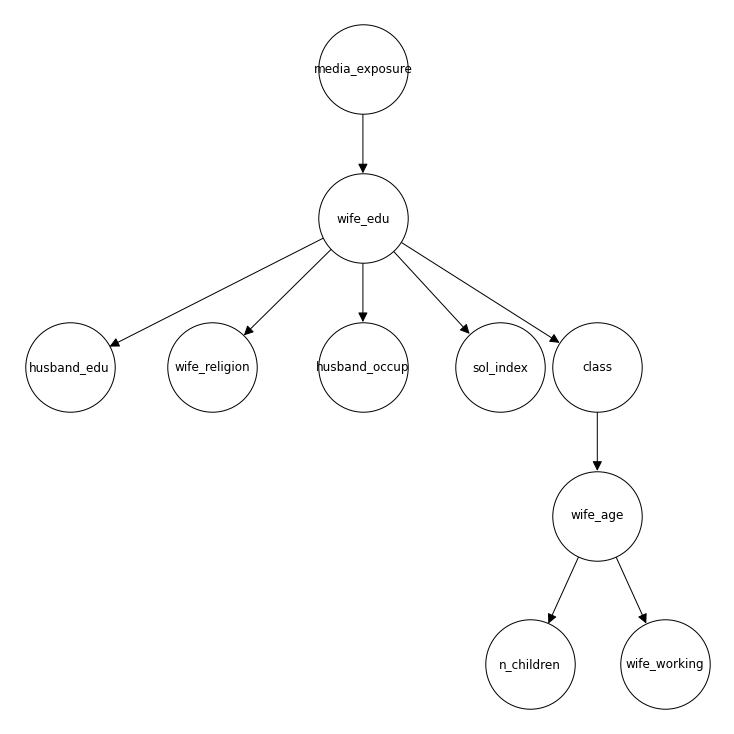

---- Network hcs_bdeu ----


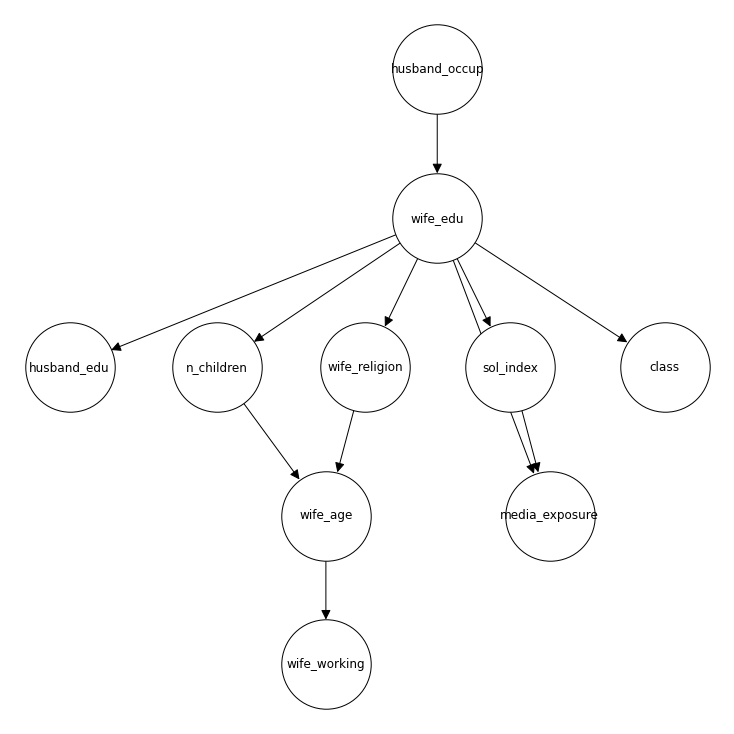

---- Network hcs_k2 ----


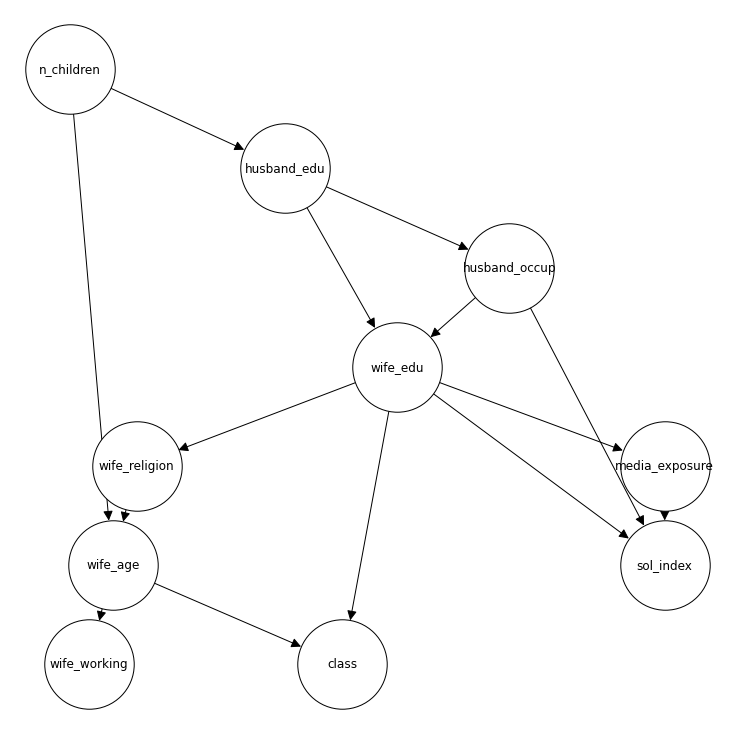

  0%|          | 16/1000000 [00:01<25:06:23, 11.06it/s]


In [5]:
est = HillClimbSearch(train_ds)
hcs_bic = est.estimate(scoring_method=BicScore(train_ds))
hcs_bdeu = est.estimate(scoring_method=BDeuScore(train_ds))
hcs_k2 = est.estimate(scoring_method=K2Score(train_ds))

# ---- Network hcs_bic ----
print('---- Network hcs_bic ----')
utils.plot_network(hcs_bic)

# ---- Network hcs_bdeu ----
print('---- Network hcs_bdeu ----')
utils.plot_network(hcs_bdeu)

# ---- Network hcs_k2 ----
print('---- Network hcs_k2 ----')
utils.plot_network(hcs_k2)


own_network_proposals = [
    network_1, network_2, network_3, 
    network_4, network_5
]

hc_own_networks = []
for own_network in own_network_proposals:
    hc_own_networks.append(
        est.estimate(scoring_method=K2Score(train_ds), start_dag=own_network.copy())
    )

### PC algorithm

Working for n conditional variables: 5: 100%|██████████| 5/5 [00:07<00:00,  1.55s/it]


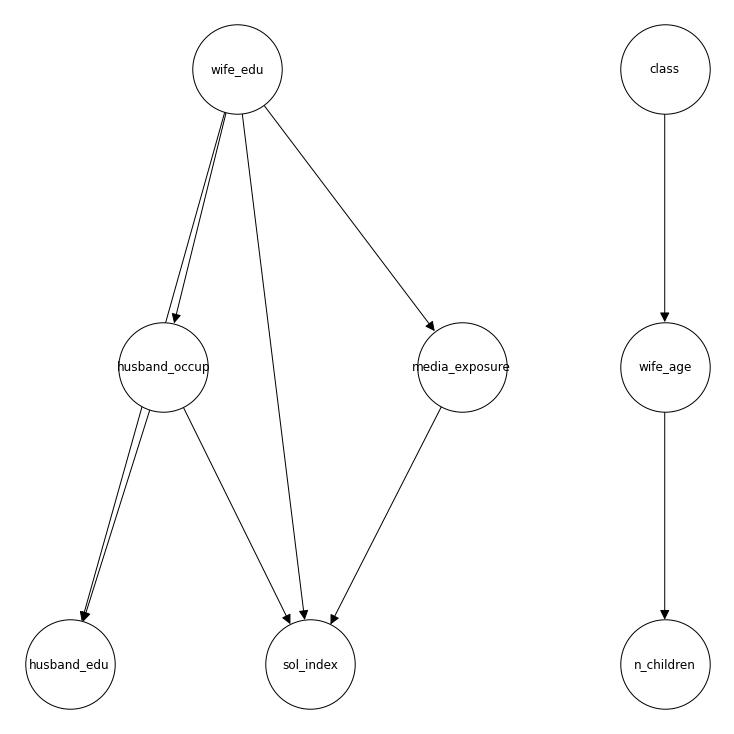

In [6]:
est = PC(train_ds)
pc_network = est.estimate()

utils.plot_network(pc_network)

### Hybrid

  0%|          | 1/1000000 [00:00<49:19:47,  5.63it/s]


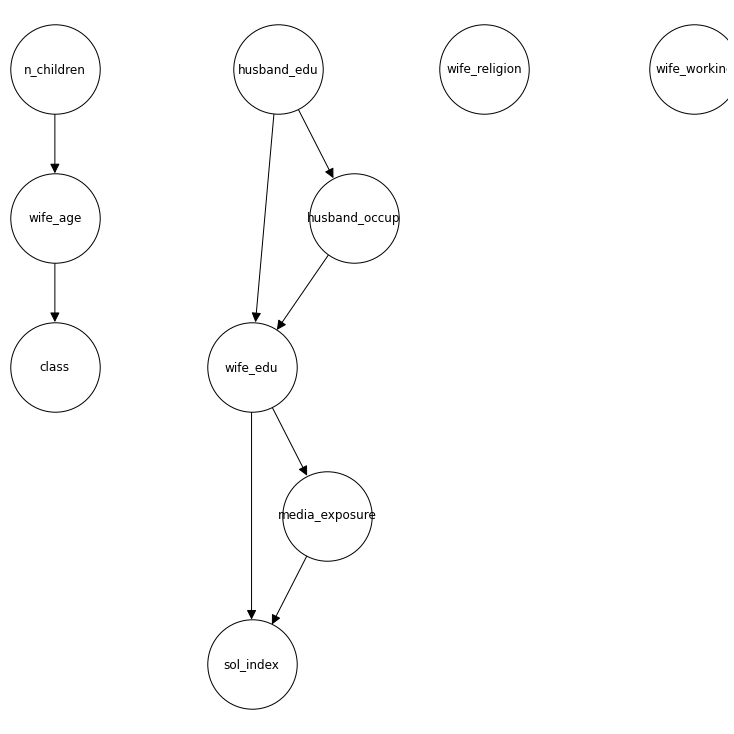

In [7]:
pc_est = PC(data=train_ds)
skeleton, separating_sets = pc_est.build_skeleton(variant='parallel')

hc = HillClimbSearch(
    data=train_ds, 
    scoring_method=BDeuScore(data=train_ds)
)

pchc_learned_model = hc.estimate(
    tabu_length=100, 
    white_list=skeleton.to_directed().edges()
)

utils.plot_network(pchc_learned_model)

## Test on chosen network

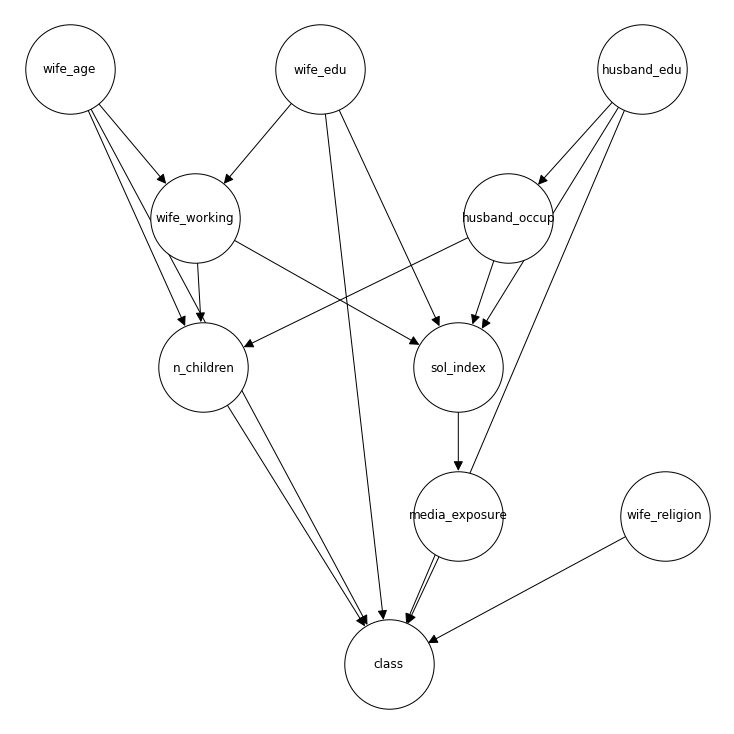

              precision    recall  f1-score   support

           1       0.49      0.74      0.59       126
           2       0.42      0.24      0.30        67
           3       0.49      0.32      0.39       102

    accuracy                           0.48       295
   macro avg       0.47      0.43      0.43       295
weighted avg       0.47      0.48      0.46       295

Took 324.2803041934967s


In [45]:
start_time = time.time()

nodes = [
    'wife_age', 'wife_edu', 'husband_edu', 'n_children', 'wife_religion', 
    'wife_working', 'husband_occup', 'sol_index', 'media_exposure', 
    'class'
]

network = network_2  # pchc_learned_model hc_own_networks[0] network_1


bn_model = BayesianNetworkModel(
    nodes=nodes,
    network=network,
    fit_estimator='BayesianEstimator'  # BayesianEstimator MaximumLikelihoodEstimator
)

utils.plot_network(bn_model.get_model())

bn_model.fit(
    training_data=data['train']
)

# from IPython.utils import io
# with io.capture_output() as captured:
y_pred = bn_model.predict(X_test)

print(utils.get_classification_report(
    y_true=y_test,
    y_pred=y_pred
))

utils.get_metrics(
    y_true=y_test,
    y_pred=y_pred,
    average='macro'
)

total_time = time.time() - start_time
print(f'Took {total_time}s')

## Run

In [8]:
# Data loading and train/test split
data = utils.load_data()
data = utils.split_data(data)

# Data copy (without discretization)
data_copy = deepcopy(data)

# Discretize data
continuous_attrs = ['wife_age', 'n_children']
data = utils.discretize_data(
    data=data, 
    continuous_attrs=continuous_attrs,
    n_bins=5
)

# Declare data sets to variables
X_train = data['train']['X']
y_train = data['train']['y']
X_test = data['test']['X']
y_test = data['test']['y']

train_ds = pd.concat([X_train, y_train], axis=1)
test_ds = pd.concat([X_test, y_test], axis=1)

# Data attribute names
nodes = list(train_ds.columns)
# [
#     'wife_age', 'wife_edu', 'husband_edu', 'n_children', 'wife_religion', 
#     'wife_working', 'husband_occup', 'sol_index', 'media_exposure', 
#     'class'
# ]

### Estimators

In [9]:
estimators_dict = {
    'BayesianEstimator': 'BayesianEstimator', 
    'MaxLLEstimator': 'MaximumLikelihoodEstimator'
}

In [10]:
for estimator_label, estimator in estimators_dict.items():
    print(f'{estimator_label}: {estimator}')

BayesianEstimator: BayesianEstimator
MaxLLEstimator: MaximumLikelihoodEstimator


### Discretized data with n bins (n in \[3,5,7,9\])

In [15]:
discretized_data_dict = {}
for n_bins in range(3,10,3):  # [3,6,9]
    data = deepcopy(data_copy)
    key = str(n_bins)+'_bins'
    data = utils.discretize_data(
        data=data, 
        continuous_attrs=continuous_attrs,
        n_bins=n_bins
    )
    discretized_data_dict[key] = data

In [17]:
train = 'train'
for discretized_data_label, discretized_data in discretized_data_dict.items():
    print(f'{discretized_data_label}:')
    print(discretized_data[train]['X'].head(5))

3_bins:
      wife_age  wife_edu  husband_edu  n_children  wife_religion  \
998        1.0         2            4         2.0              1   
254        2.0         1            3         0.0              1   
1074       2.0         1            2         1.0              1   
643        1.0         2            2         0.0              1   
1452       0.0         3            2         0.0              1   

      wife_working  husband_occup  sol_index  media_exposure  
998              1              1          4               1  
254              1              3          3               1  
1074             1              3          3               1  
643              1              3          1               0  
1452             1              3          4               0  
6_bins:
      wife_age  wife_edu  husband_edu  n_children  wife_religion  \
998        3.0         2            4         4.0              1   
254        5.0         1            3         1.0            

### Networks

In [21]:
networks_dict = {
    'network_1': network_1, 
    'network_2': network_2, 
    'network_3': network_3, 
    'network_4': network_4, 
    'naive_bayes': network_5, 
    'hcs_bic': hcs_bic, 
    'hcs_bdeu': hcs_bdeu, 
    'hcs_k2': hcs_k2, 
    'pc': pc_network, 
    'hcs_network_1': hc_own_networks[0], 
    'hcs_network_2': hc_own_networks[1], 
    'hcs_network_3': hc_own_networks[2], 
    'hcs_network_4': hc_own_networks[3], 
    'hcs_naive_bayes': hc_own_networks[4], 
    'hcs_pc': pchc_learned_model
}

network_1


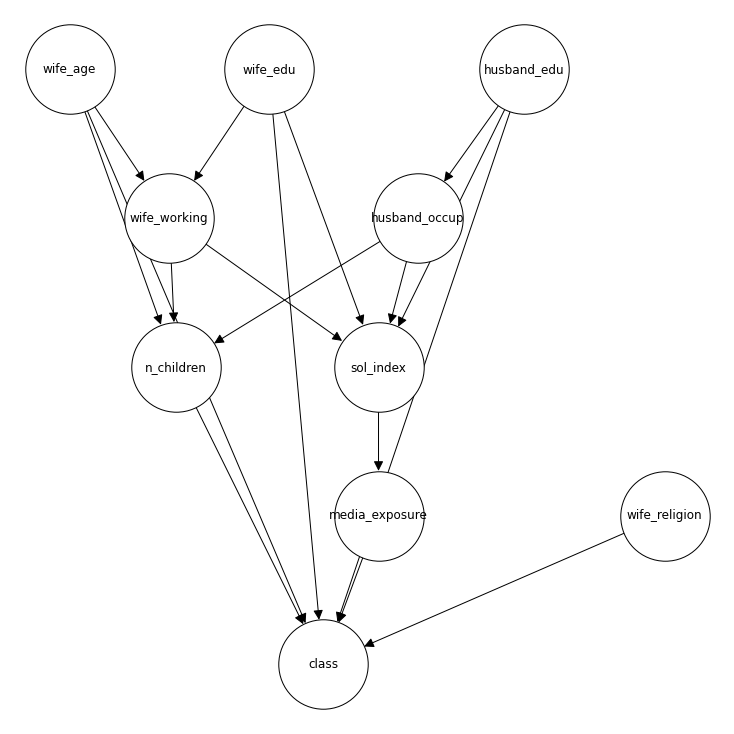

network_2


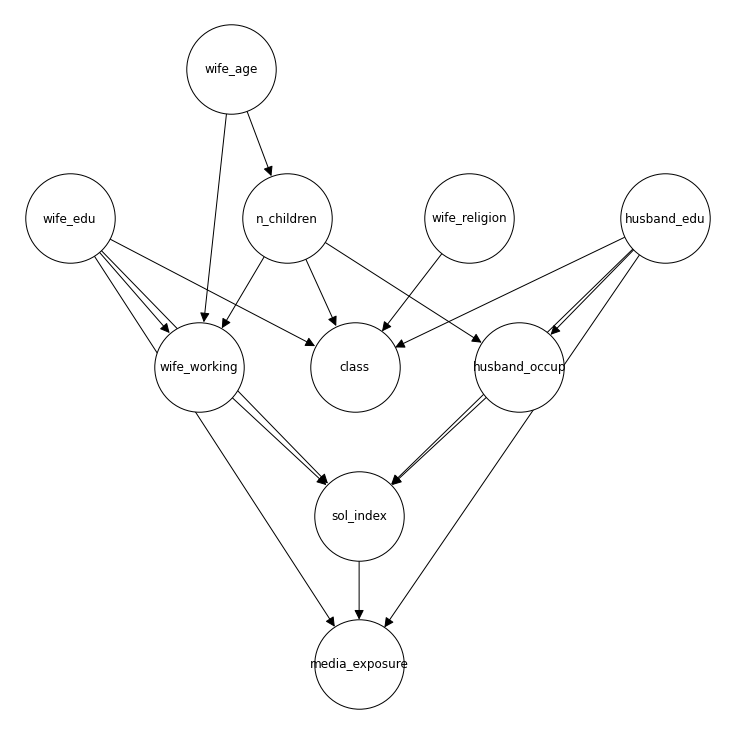

network_3


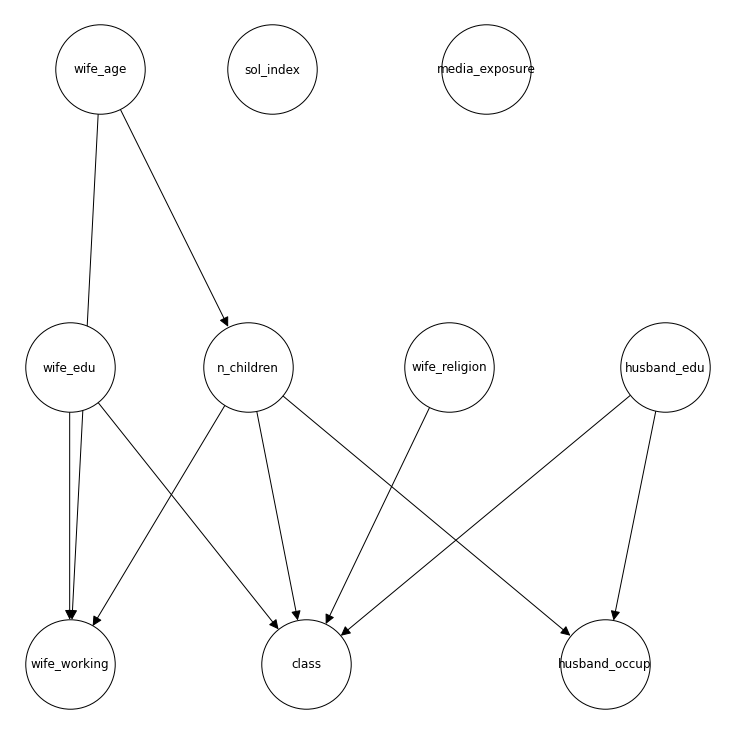

network_4


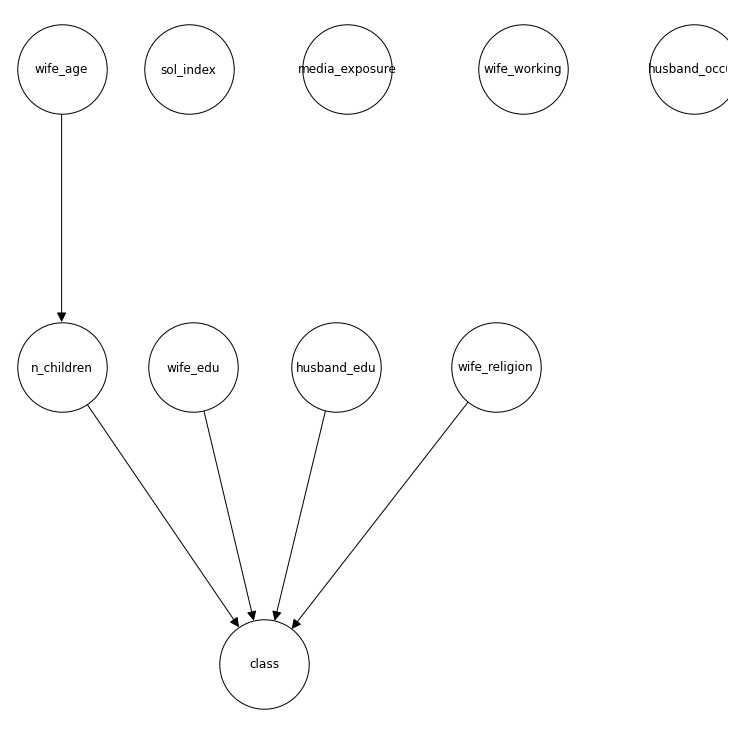

naive_bayes


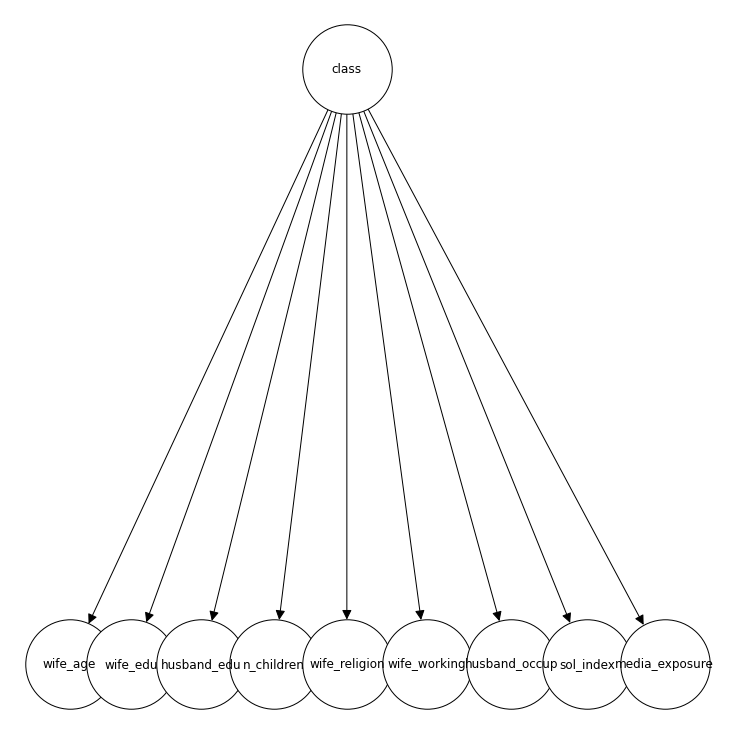

hcs_bic


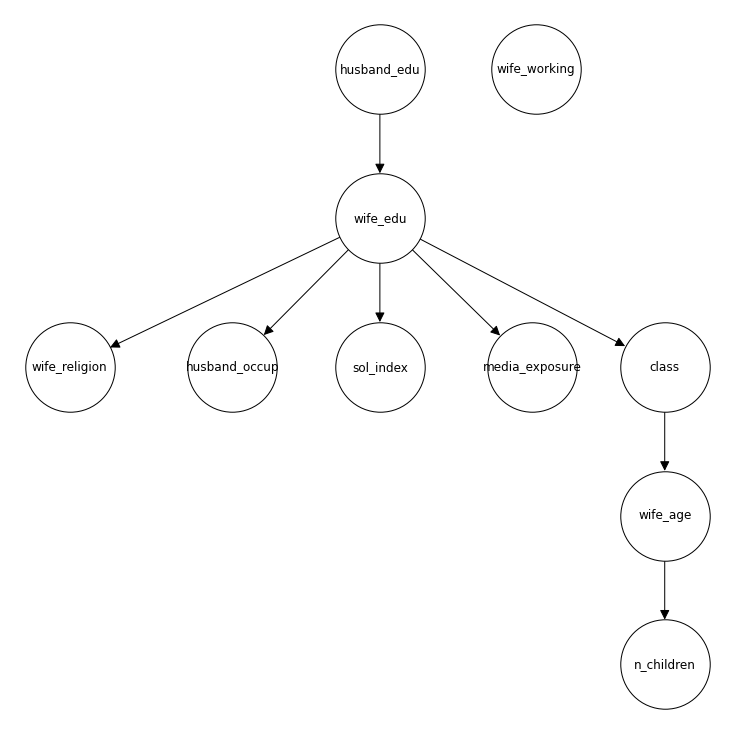

hcs_bdeu


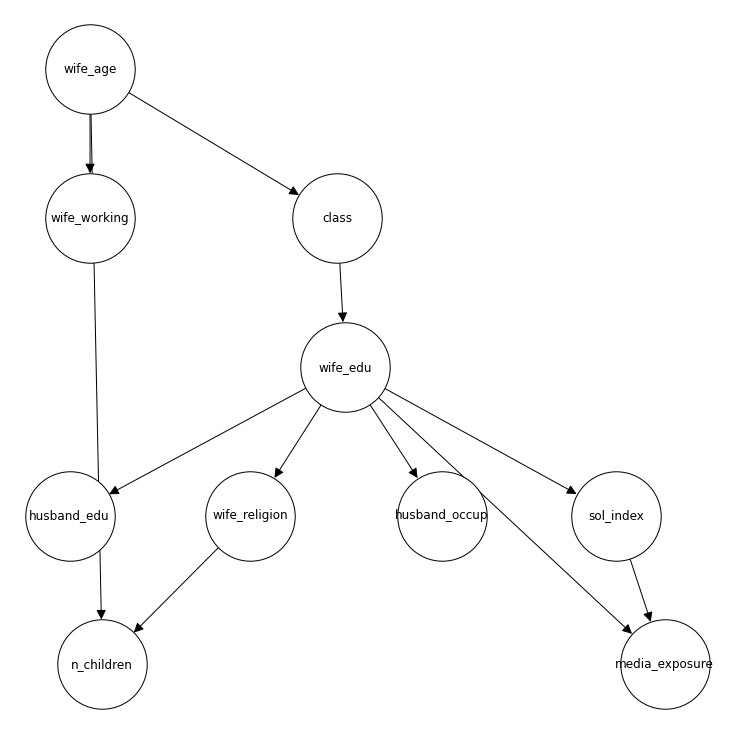

hcs_k2


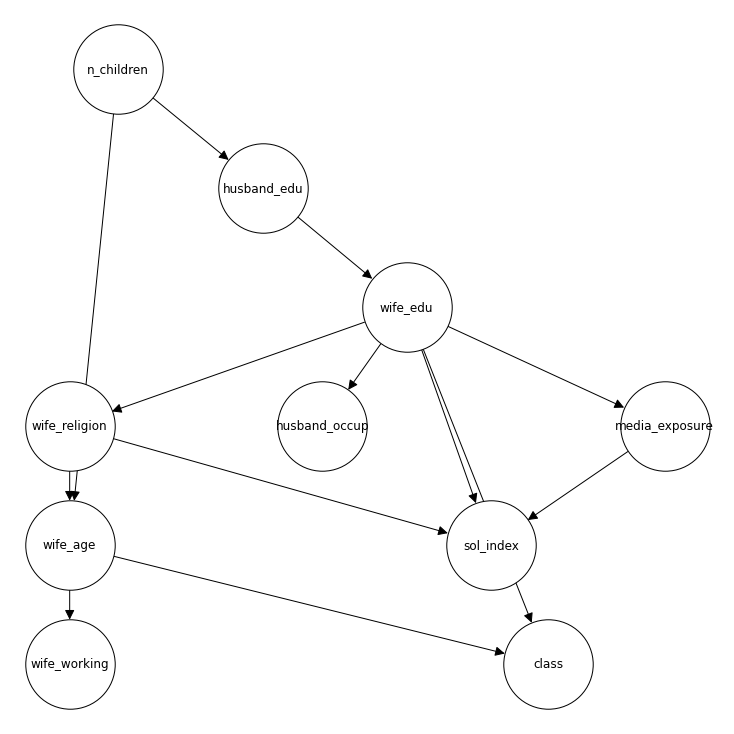

pc


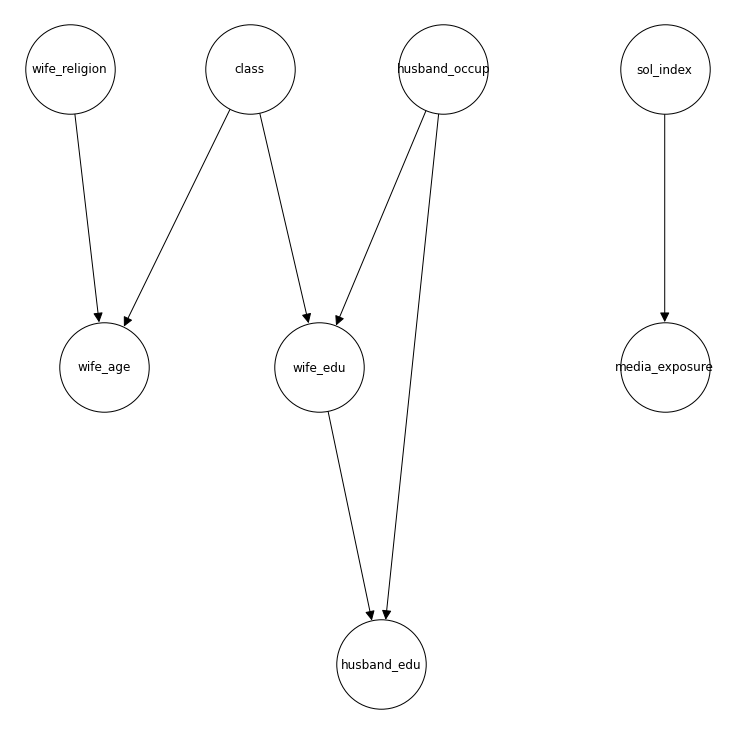

hcs_network_1


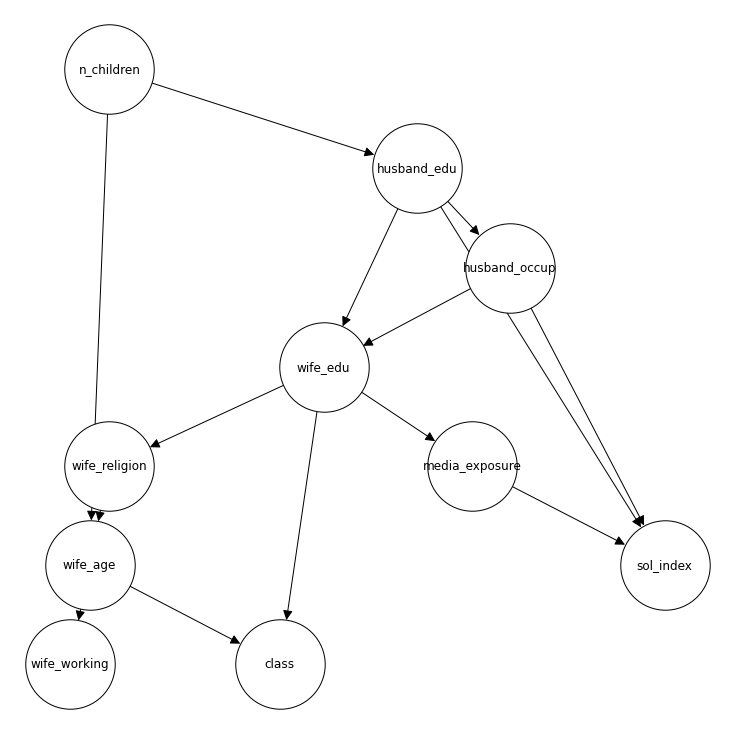

hcs_network_2


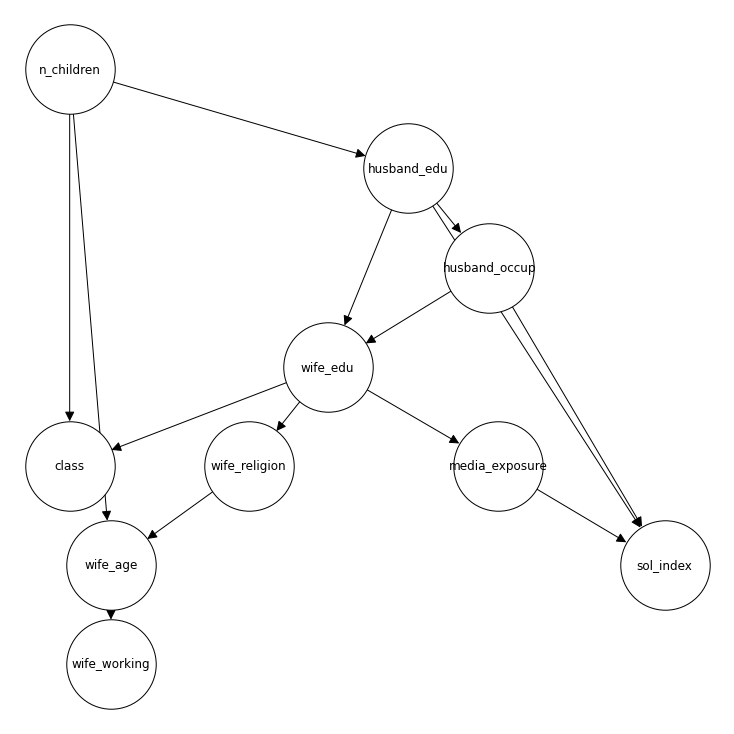

hcs_network_3


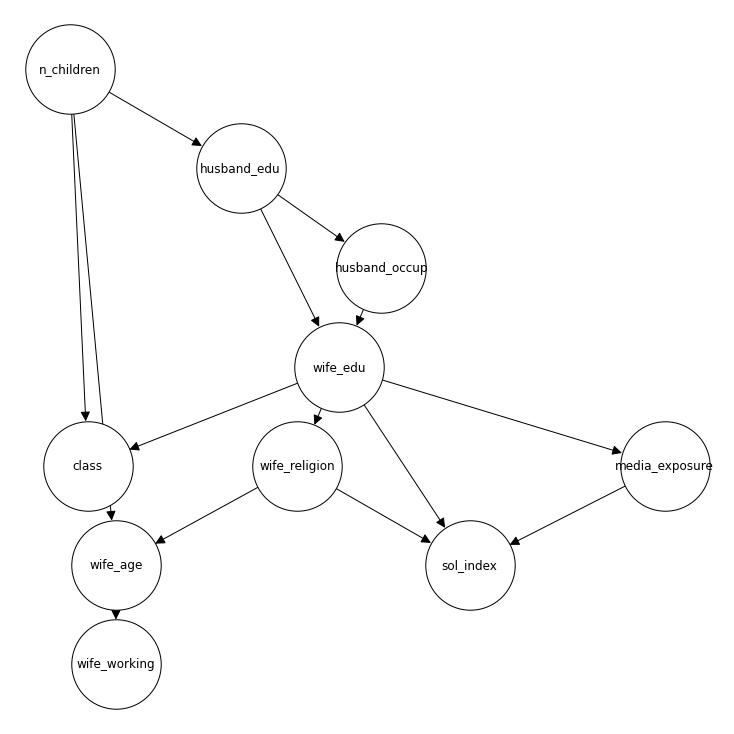

hcs_network_4


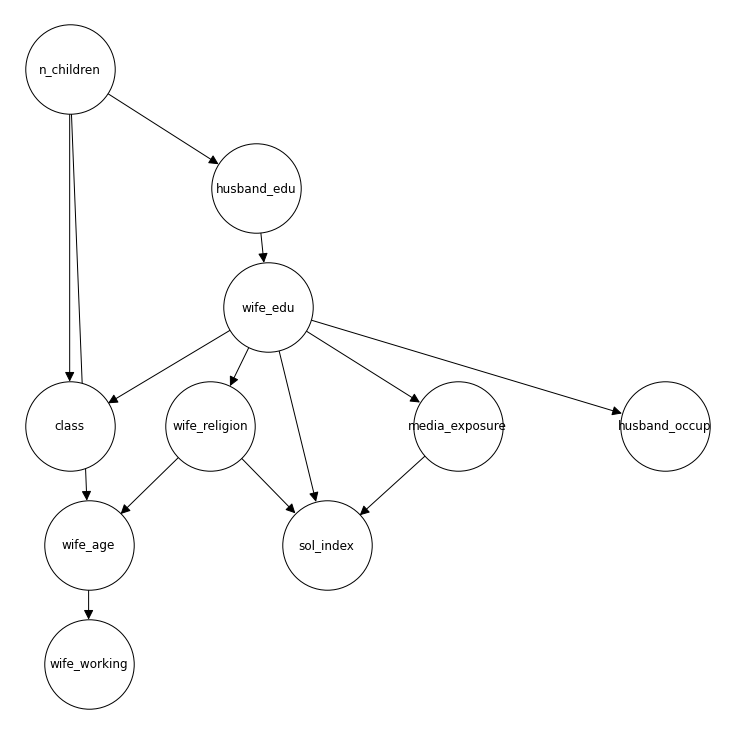

hcs_naive_bayes


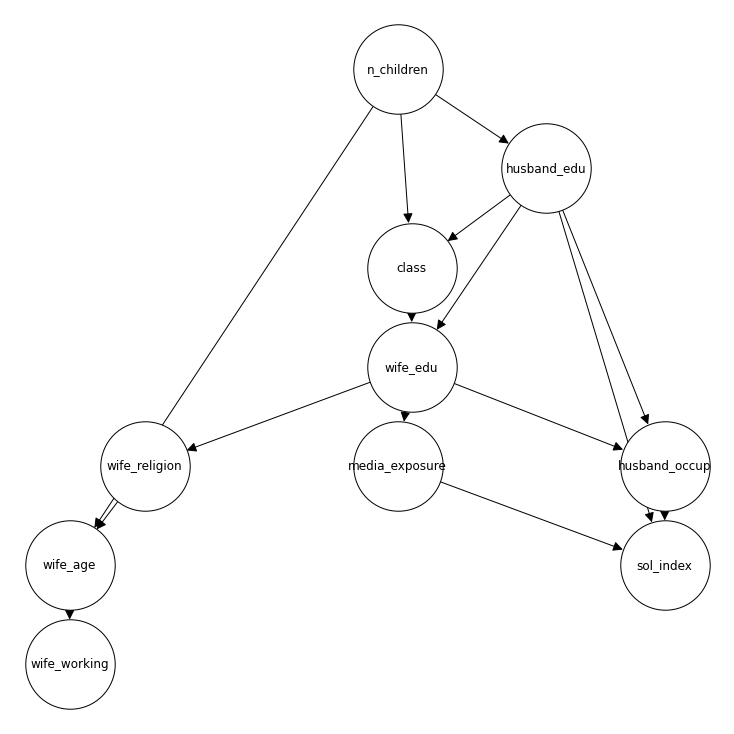

hcs_pc


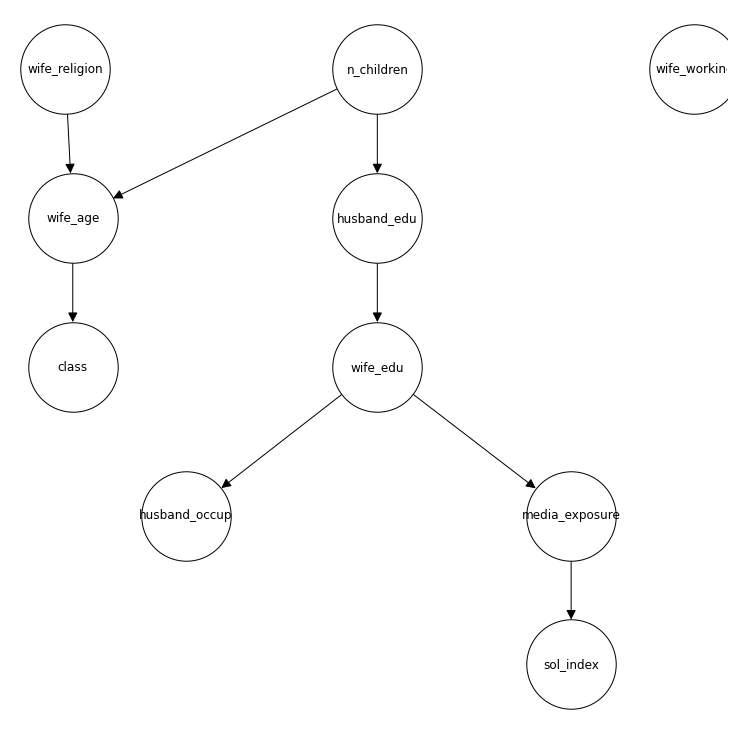

In [22]:
for network_label, network in networks_dict.items():
    print(f'{network_label}')
    utils.plot_network(network)